In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

In [5]:
nao_sst = pd.read_csv('nao.txt', delim_whitespace=True)

In [6]:
nao_sst

,Year,avg
0,1950,0.130
1,1951,0.198
2,1952,-0.262
3,1953,0.512
4,1954,-0.440
...,...,...
70,2020,-0.018
71,2021,-0.278
72,2022,0.040
73,2023,-1.204


In [183]:
tmp = load("joblib_files/temp.joblib")

In [143]:
enso_df = load("joblib_files/enso.joblib")

In [144]:
sahel_df = load("joblib_files/sahel_df.joblib")

In [166]:
amo_df = load("joblib_files/amo_df.joblib")

In [146]:
cyclones_total_df = load("joblib_files/total_cyclones.joblib")

In [147]:
hurricane_only_df = load("joblib_files/hurricane_only.joblib")

In [148]:
sahel_df['Annual'] = sahel_df['Annual'] / 25.4

In [126]:
hurricane_only_df.sum()

Cyclone        38
Year       331227
dtype: int64

In [149]:
sahel_df.head(2)

,may,jun,jul,aug,sep,Annual
Year,,,,,,
1901,115,299,346,607,232,6.295276
1902,115,25,330,14,-321,0.641732


In [150]:
enso_df

,Year,JJA,JAS,ASO,SON,Annual
0,1950,-1.5,-1.3,-1.2,-1.2,-1.300
1,1951,-0.8,-0.5,-0.2,0.2,-0.325
2,1952,0.5,0.4,0.3,0.3,0.375
3,1953,0.4,0.6,0.6,0.7,0.575
4,1954,0.8,0.5,0.0,-0.4,0.225
...,...,...,...,...,...,...
69,2019,0.7,0.7,0.7,0.7,0.700
70,2020,0.5,0.5,0.4,0.2,0.400
71,2021,-1.0,-0.9,-0.8,-0.7,-0.850
72,2022,-1.0,-0.9,-1.0,-1.1,-1.000


In [23]:
#amo_df['Annual'] = amo_df['Annual'] * 2

In [167]:
amo_df.head(2)

,Year,Jun,Jul,Aug,Sep,Oct,Annual
0,1861,0.314,0.436,0.324,0.281,0.236,0.3182
1,1862,-0.023,-0.272,-0.246,-0.235,-0.244,-0.2040


In [152]:
cyclones_total_df

1852    1
1853    1
1854    1
1855    0
1856    0
       ..
2018    0
2019    2
2020    1
2021    0
2022    3
Name: Cyclone, Length: 171, dtype: int64

In [153]:
hurricane_only_df.head()

,Cyclone,Year
1852,0,1852
1853,1,1853
1854,1,1854
1855,0,1855
1856,0,1856


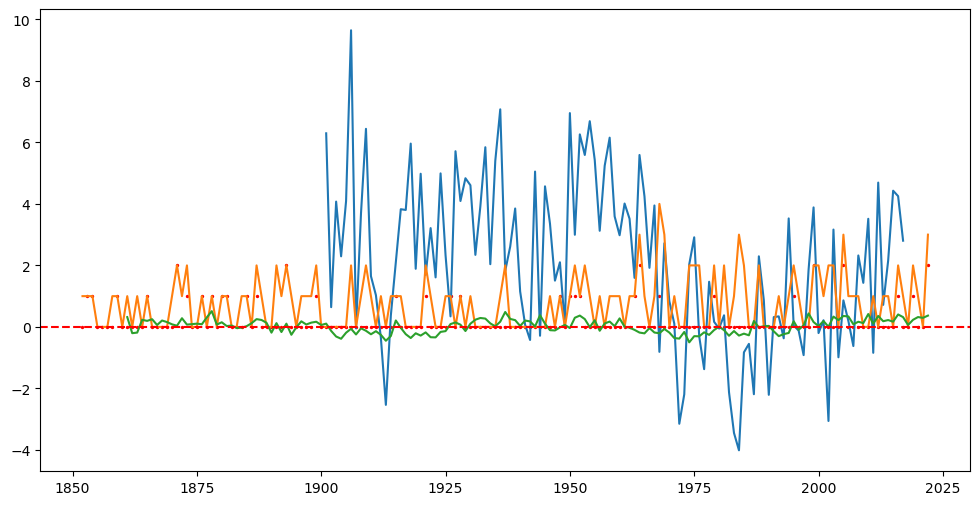

In [168]:
plt.figure(figsize=(12, 6))
plt.plot(sahel_df.index, sahel_df['Annual'])
plt.plot(cyclones_total_df.index, cyclones_total_df)
plt.plot(amo_df['Year'], amo_df['Annual'])
plt.scatter(hurricane_only_df.index, hurricane_only_df['Cyclone'], s=2, c='r')
plt.axhline(y=0, color='r', linestyle='--')

In [155]:
hurricane_only_df

,Cyclone,Year
1852,0,1852
1853,1,1853
1854,1,1854
1855,0,1855
1856,0,1856
...,...,...
2018,0,2018
2019,1,2019
2020,0,2020
2021,0,2021


In [156]:
enso_df = enso_df.copy()
enso_df = enso_df[['Year', 'Annual']]
enso_df = enso_df.rename(columns={'Annual':'ENSO_Annual'})
enso_df

,Year,ENSO_Annual
0,1950,-1.300
1,1951,-0.325
2,1952,0.375
3,1953,0.575
4,1954,0.225
...,...,...
69,2019,0.700
70,2020,0.400
71,2021,-0.850
72,2022,-1.000


In [157]:
one_sahel = sahel_df.copy()
one_sahel = one_sahel[['Annual']]
one_sahel = one_sahel.reset_index()
one_sahel = one_sahel.rename(columns={'Annual':'Sahel_Annual'})
one_sahel

,Year,Sahel_Annual
0,1901,6.295276
1,1902,0.641732
2,1903,4.074803
3,1904,2.295276
4,1905,4.094488
...,...,...
112,2013,0.716535
113,2014,2.157480
114,2015,4.429134
115,2016,4.251969


In [158]:
two_amo = amo_df[['Year', 'Annual']]
two_amo = two_amo.rename(columns={'Annual':'AMO_Annual'})

In [163]:
three_cyclone = pd.DataFrame(cyclones_total_df)
three_cyclone = three_cyclone.reset_index(names='Year')
three_cyclone = three_cyclone.rename(columns={'Cyclone':'Annual_Cyclones'})
three_cyclone.sample(20)

,Year,Annual_Cyclones
38,1890,0
110,1962,1
120,1972,0
151,2003,2
13,1865,1
108,1960,1
58,1910,1
125,1977,0
122,1974,2
64,1916,1


In [188]:
tmp = tmp.rename(columns={'Annual':'TEMP_Annual'})

In [189]:
combined_dfs = three_cyclone.copy()
combined_dfs = combined_dfs.merge(one_sahel, on='Year', how="left")
combined_dfs = combined_dfs.merge(two_amo, on='Year')
combined_dfs = combined_dfs.merge(enso_df, on='Year', how='left')
combined_dfs = combined_dfs.merge(tmp, on='Year', how='left')
combined_dfs.set_index('Year', inplace=True)
combined_dfs.tail(20)

,Annual_Cyclones,Sahel_Annual,AMO_Annual,ENSO_Annual,TEMP_Annual
Year,,,,,
2003,2,3.165354,0.197583,0.475,78.94
2004,0,-0.988189,0.172417,0.275,79.78
2005,3,0.862205,0.257750,0.500,80.02
2006,1,0.192913,0.232500,-0.675,79.12
2007,1,-0.622047,0.113333,0.125,80.34
2008,1,2.322835,0.103833,-1.350,78.72
2009,0,1.433071,0.004667,-0.625,81.00
2010,0,3.515748,0.315083,0.975,80.64
2011,1,-0.842520,0.067250,-1.050,79.64


In [190]:
combined_dfs.to_csv("combined_dfs.csv")

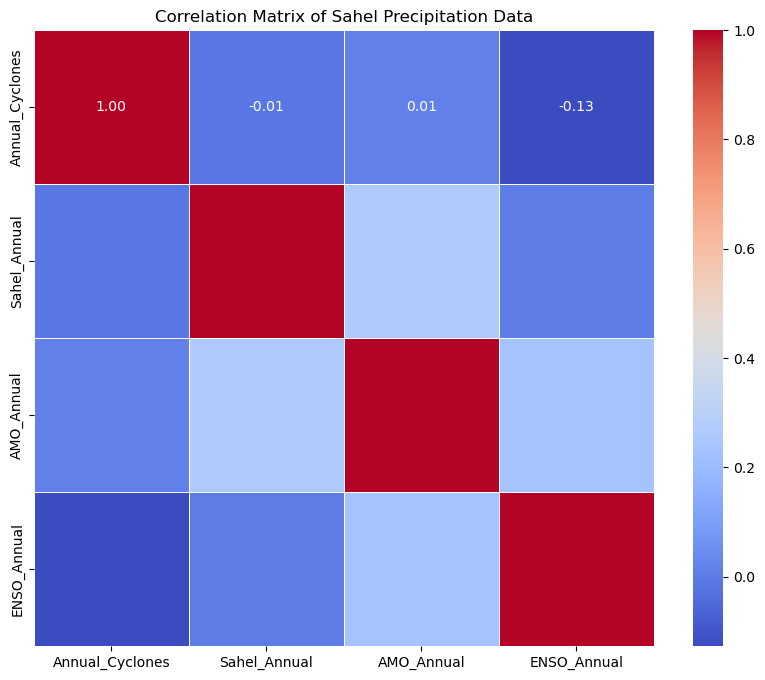

In [177]:
correlation_matrix = combined_dfs.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=.5, annot=True)
plt.title('Correlation Matrix of Sahel Precipitation Data')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


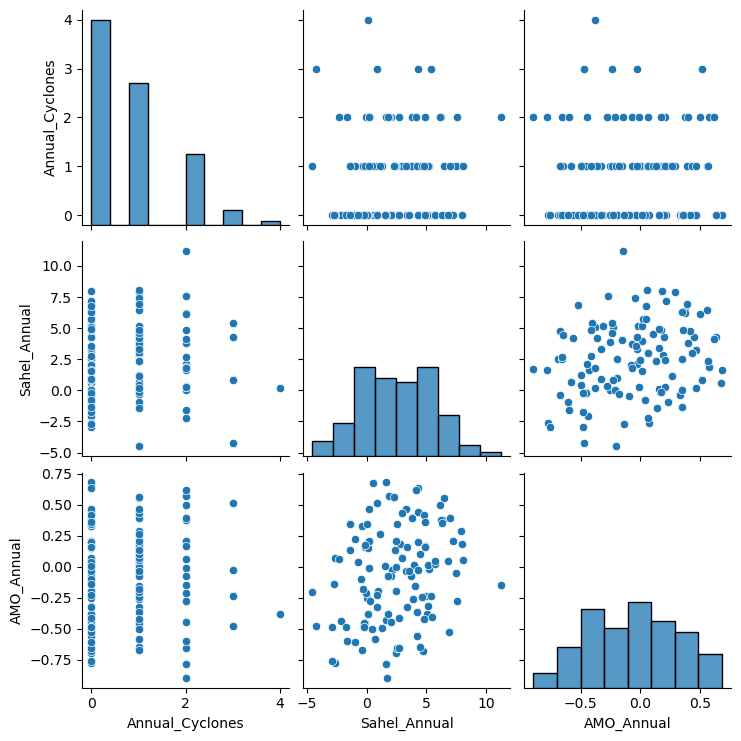

In [94]:
sns.pairplot(combined_dfs)